In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import os
import glob
# path of the data
path = r'C:/Users/pmbw/Development/datasets/velocities_current600' 
#Smoothing function
from scipy.ndimage.filters import gaussian_filter1d
#import chart_studio.plotly as py
import plotly as py
import plotly.graph_objs as go 
import ipywidgets as wingets
from scipy import special

#plt.plot(df.OneMin_rPlus,df.UzPlus, color ='black', linewidth=2, markersize=12)
#plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)

py.offline.init_notebook_mode(connected=True)

In [2]:
#!pip install chart_studio

# Import Data

## Velocities average for DNS datasets

In [3]:
#Velocities average for DNS datasets
all_velocities =  glob.glob(path + "/vel*.dat")
#os.path.join(path, "*.csv")
velocity_lists = []
#iterate through velocities and collate as one file
for velocities in all_velocities:
    velocities_df = pd.read_csv(velocities, index_col=None, header=None,delim_whitespace=True)
    velocity_lists.append(velocities_df)
#concatenate and average for each points ie distance from the wall    
df_avg = pd.concat([each.stack() for each in velocity_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
df_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity']
#Normalise data and add additional variables 
df_avg['dist_norm'] = ((0.4992-df_avg.distance_from_wall))*2 
#df_avg.to_csv('./datasets/velocities/hendek.csv')

# RMS datasets

In [4]:
all_rms =  glob.glob(path + "/rms*.dat")
rms_lists = []
#iterate through velocities and collate as one file
for rms in all_rms:
    rms_df = pd.read_csv(rms, index_col=None, header=None,delim_whitespace=True)
    rms_lists.append(rms_df)
#concatenate and average for each points ie distance from the wall    
dfrms_avg = pd.concat([each.stack() for each in rms_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
dfrms_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity','shear_stress']
#Normalise data and add additional variables 
dfrms_avg['dist_norm'] = ((0.4992-dfrms_avg.distance_from_wall))*2 
#dfrms_avg['uzur'] = dfrms_avg.men**2


In [5]:
dfrms_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,shear_stress,dist_norm
0,0.00000,0.041569,0.043261,0.049835,0.000077,0.9984
1,0.00375,0.042475,0.042479,0.049859,0.000045,0.9909
2,0.00500,0.042461,0.042465,0.049881,0.000063,0.9884
3,0.01250,0.042497,0.042530,0.050017,0.000099,0.9734
4,0.01750,0.042543,0.042541,0.050174,0.000133,0.9634


# Previous DNS datasets

In [6]:
df = pd.read_csv('C://Leeds/Datasets_El_Khoury/Re361/360_Re_1.dat',
          skiprows=24, header=None, sep='\s\s+', engine='python') 
df.columns = ['OneMin_r', 'OneMin_rPlus1','UzPlus1','UzByUb1', 'Ur_rmsPlus1','Ut_rmsPlus1','Uz_rmsPlus1', 'UzUrPlus1','dUzdrPlus1']
df['OneMin_rPlus'] =df.OneMin_rPlus1/3.6121788913802544E+02
df['UzPlus'] = df.UzPlus1*6.1746647715901784E-02
df['Uz_rmsPlus'] = df.Uz_rmsPlus1*6.1746647715901784E-02

df['Ur_rmsPlus'] = df.Ur_rmsPlus1*6.1746647715901784E-02
df['Ut_rmsPlus'] = df.Ut_rmsPlus1*6.1746647715901784E-02
#Waring invalid value for last row - it's small number when square root taken it invokes runtime error
df['UzUrPlus'] = np.sqrt(df.UzUrPlus1)*6.1746647715901784E-02

C:\Users\pmbw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

invalid value encountered in sqrt



# Mean axial velocity $U_z^+$

In [7]:
# character description

# '-'       solid line style # '--'      dashed line style # '-.'      dash-dot line style
# ':'       dotted line style # '.'       point marker # ','       pixel marker
# 'o'       circle marker # 'v'       triangle_down marker # '^'       triangle_up marker
# '<'       triangle_left marker # '>'       triangle_right marker # '1'       tri_down marker
# '2'       tri_up marker # '3'       tri_left marker # '4'       tri_right marker
# 's'       square marker # 'p'       pentagon marker # '*'       star marker
# 'h'       hexagon1 marker # 'H'       hexagon2 marker # '+'       plus marker
# 'x'       x marker # 'D'       diamond marker # 'd'       thin_diamond marker
# '|'       vline marker # '_'       hline marker

In [8]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

In [9]:
z_velocity_smoothed = gaussian_filter1d(df_avg.z_velocity, sigma=0.6)

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_avg.dist_norm, y=z_velocity_smoothed, 
                         name='Present', line = dict(color='black', width=3,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.UzPlus, 
                         name='El Koury', line = dict(color='black')))
fig.update_layout(
    title = dict(text ="Mean axial velocity at 360 shear Reynolds number - log scale", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$U_z^*$', font= dict(color ='black')),
    xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_avg.dist_norm, y=z_velocity_smoothed, 
                         name='Present', line = dict(color='black', width=3,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.UzPlus, 
                         name='El Koury', line = dict(color='black')))

fig.update_layout(
    title = dict(text ="Mean axial velocity at 360 shear Reynolds number", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$U_z^*$', font= dict(color ='black')),
    #xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

# RMS


In [12]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

In [13]:
x_rms_smoothed = gaussian_filter1d(dfrms_avg.x_velocity, sigma=0.5)
y_rms_smoothed = gaussian_filter1d(dfrms_avg.y_velocity, sigma=0.5)
z_rms_smoothed = gaussian_filter1d(dfrms_avg.z_velocity, sigma=0.5)
shear_stress_rms_smoothed = gaussian_filter1d(np.sqrt(dfrms_avg.shear_stress), sigma=0.5)
# plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
# plt.plot(dfrms_avg.dist_norm,x_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
                        x=dfrms_avg.dist_norm, y=z_rms_smoothed,
                         name='$Present-u_{RMS}^*$', line = dict(color='black', width=3,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Uz_rmsPlus, 
                         name= '$El Koury-u_{RMS}^*$', line = dict(width=2,color='black')))
fig.add_trace(go.Scatter(x=dfrms_avg.dist_norm, y=x_rms_smoothed, 
                         name='$Present-v_{RMS}^*$', line = dict(color='black', width=4,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Ur_rmsPlus,
                         name='$El Koury-v_{RMS}^*$', line = dict(width=2,color='black')))
fig.add_trace(go.Scatter(x=dfrms_avg.dist_norm, y=y_rms_smoothed,
                         name='$Present-w_{RMS}^*$', line = dict(color='black', width=4,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Ut_rmsPlus,
                         name='$El Koury-w_{RMS}^*$', line = dict(width=2,color='black')))

fig.update_layout(
    title = dict(text ="Root mean square of velocity fluctuations", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$U_z^*$', font= dict(color ='black')),
    #xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
                        x=dfrms_avg.dist_norm, y=z_rms_smoothed,
                         name='$Present-u_{RMS}^*$', line = dict(color='black', width=4,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Uz_rmsPlus, 
                         name= '$El Koury-u_{RMS}^*$', line = dict(width=2,color='black')))
fig.add_trace(go.Scatter(x=dfrms_avg.dist_norm, y=x_rms_smoothed, 
                         name='$Present-v_{RMS}^*$', line = dict(color='black', width=4,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Ur_rmsPlus, 
                         name='$El Koury-v_{RMS}^*$', line = dict(width=2,color='black')))
fig.add_trace(go.Scatter(x=dfrms_avg.dist_norm, y=y_rms_smoothed,
                         name='$Present-w_{RMS}^*$', line = dict(color='black', width=4,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.Ut_rmsPlus, 
                         name='$El Koury-w_{RMS}^*$', line = dict(width=2,color='black')))
fig.update_layout(
    title = dict(text ="Root mean square of velocity fluctuations - log scale", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$U_z^*$', font= dict(color ='black')),
    xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_avg.dist_norm, y=shear_stress_rms_smoothed, 
                         name='Present', line = dict(color='black', width=3,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.UzUrPlus, 
                         name='El Koury', line = dict(color='black')))

fig.update_layout(
    title = dict(text ="Reynolds shear stress - log scale", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$(U_z,U_r)^*$', font= dict(color ='black')),
    xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_avg.dist_norm, y=shear_stress_rms_smoothed, 
                         name='Present', line = dict(color='black', width=3,   dash='dot')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.UzUrPlus, 
                         name='El Koury', line = dict(color='black')))

fig.update_layout(
    title = dict(text ="Reynolds shear stress", font =dict(color ='black')),
    xaxis_title = dict(text ='$(1-r)^*$', font= dict(color ='black')),
    yaxis_title =dict(text ='$(U_z,U_r)^*$', font= dict(color ='black')),
    #xaxis_type="log", 
    autosize=False,
    width=600,
    height=500)

fig.show()

# Experimenting 

In [18]:
df_avg.loc[(df_avg.dist_norm < 1) , 'norm'] = 1
df_avg.loc[(df_avg.dist_norm < 0.975),'norm'] = 0.975
df_avg.loc[(df_avg.dist_norm < 0.95) , 'norm'] = 0.95
df_avg.loc[(df_avg.dist_norm < 0.925), 'norm'] = 0.925
df_avg.loc[(df_avg.dist_norm < 0.9) , 'norm'] = 0.9
df_avg.loc[(df_avg.dist_norm < 0.875),'norm'] = 0.875
df_avg.loc[(df_avg.dist_norm < 0.85), 'norm'] = 0.85
df_avg.loc[(df_avg.dist_norm < 0.825) , 'norm'] = 0.825
df_avg.loc[(df_avg.dist_norm < 0.8) , 'norm'] = 0.8
df_avg.loc[(df_avg.dist_norm < 0.775) , 'norm'] = 0.775
df_avg.loc[(df_avg.dist_norm < 0.75) , 'norm'] = 0.75
df_avg.loc[(df_avg.dist_norm < 0.725) , 'norm'] = 0.725
df_avg.loc[(df_avg.dist_norm < 0.7) , 'norm'] = 0.7
df_avg.loc[(df_avg.dist_norm < 0.675) , 'norm'] = 0.675
df_avg.loc[(df_avg.dist_norm < 0.65) , 'norm'] = 0.65
df_avg.loc[(df_avg.dist_norm < 0.625) , 'norm'] = 0.625
df_avg.loc[(df_avg.dist_norm < 0.6) , 'norm'] = 0.6
df_avg.loc[(df_avg.dist_norm < 0.575) , 'norm'] = 0.575
df_avg.loc[(df_avg.dist_norm < 0.55) , 'norm'] = 0.55
df_avg.loc[(df_avg.dist_norm < 0.525) , 'norm'] = 0.525
df_avg.loc[(df_avg.dist_norm < 0.5) , 'norm'] = 0.5
df_avg.loc[(df_avg.dist_norm < 0.475) , 'norm'] = 0.475
df_avg.loc[(df_avg.dist_norm < 0.45) , 'norm'] = 0.45
df_avg.loc[(df_avg.dist_norm < 0.425) , 'norm'] = 0.425
df_avg.loc[(df_avg.dist_norm < 0.4) , 'norm'] = 0.4
df_avg.loc[(df_avg.dist_norm < 0.375) , 'norm'] = 0.375
df_avg.loc[(df_avg.dist_norm < 0.35) , 'norm'] = 0.35
df_avg.loc[(df_avg.dist_norm < 0.325) , 'norm'] = 0.325
df_avg.loc[(df_avg.dist_norm < 0.3) , 'norm'] = 0.3
df_avg.loc[(df_avg.dist_norm < 0.275) , 'norm'] = 0.275
df_avg.loc[(df_avg.dist_norm < 0.25) , 'norm'] = 0.25
df_avg.loc[(df_avg.dist_norm < 0.225) , 'norm'] = 0.225
df_avg.loc[(df_avg.dist_norm < 0.2) , 'norm'] = 0.2
df_avg.loc[(df_avg.dist_norm < 0.15) , 'norm'] = 0.175
df_avg.loc[(df_avg.dist_norm < 0.15) , 'norm'] = 0.15
df_avg.loc[(df_avg.dist_norm < 0.1275) , 'norm'] = 0.125
df_avg.loc[(df_avg.dist_norm < 0.1) , 'norm'] = 0.1


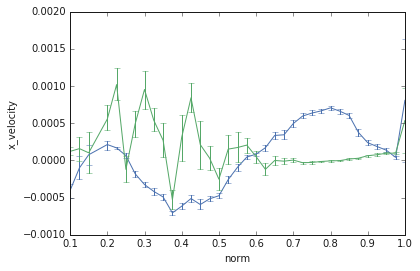

In [19]:
#ax = sns.lineplot(x="norm", y="z_velocity", err_style="bars", ci=68, data=df_avg)
ax = sns.lineplot(x="norm", y="y_velocity", err_style="bars", ci=68, data=df_avg)
ax = sns.lineplot(x="norm", y="x_velocity", err_style="bars", ci=68, data=df_avg)


In [20]:
df_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,dist_norm,norm
0,0.00000,0.001424,0.002459,1.266951,0.9984,1.000
1,0.00375,0.000076,-0.000015,1.266912,0.9909,1.000
2,0.00500,0.000109,-0.000022,1.266875,0.9884,1.000
3,0.01250,0.000081,0.000024,1.266583,0.9734,0.975
4,0.01750,0.000114,0.000058,1.266259,0.9634,0.975


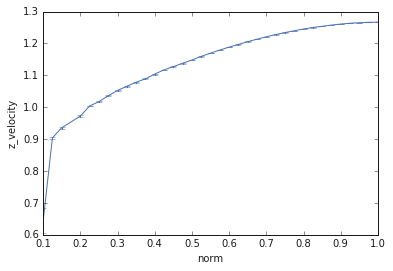

In [21]:
ax = sns.lineplot(x="norm", y="z_velocity", err_style="bars", ci=68, data=df_avg)

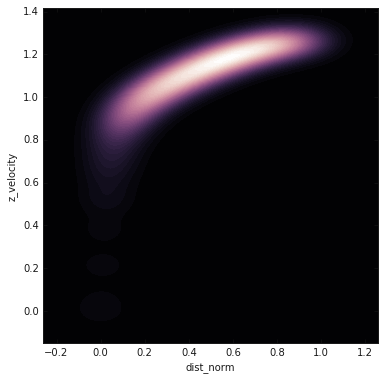

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_avg.dist_norm, df_avg.z_velocity, cmap=cmap, n_levels=60, shade=True);

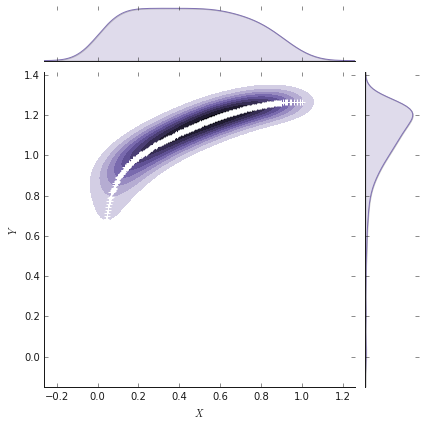

In [23]:
g = sns.jointplot(x="dist_norm", y="z_velocity", data=df_avg, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Linear regression with marginal distributions